In [1]:
#设置回测的开始和结束时间
start_date = '2019-01-01'
end_date   = '2023-03-31'

In [2]:
#加载数据
from firefin.data.gateway import *
data = fetch_data(["open", "close", "volume","return_adj","index"])

close_price = data["close"].loc[start_date:end_date]
open_price = data["open"].loc[start_date:end_date]
volume = data["volume"].loc[start_date:end_date]


2025-08-22 12:39:46.206 | INFO     | firefin.common.config:<module>:37 - No additional JSON files found in DATA_PATH, load default DATA_MAPS.
D:\PycharmProjects\fire_project\firefin\data\gateway.py:81: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(obj)
D:\PycharmProjects\fire_project\firefin\data\gateway.py:81: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(obj)
2025-08-22 12:39:47.870 | WARNING  | firefin.data.gateway:fetch_data:139 - index is not a valid data name, mock with random data


In [3]:
#计算forward return 1天 5天 10天的收益
from firefin.core.eva_utils import *
# compute forward returns
fr = compute_forward_returns(open_price.shift(-1), [1, 5, 10])

In [4]:
#构造因子(这里仅作为展示，因子的格式是T*N的pd.DataFrame)
def ts_corr(x, y, window=10):
    """
    Wrapper function to estimate rolling correlations.
    :param x, y: pandas DataFrames.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return x.rolling(window).corr(y)

factor = ts_corr(close_price, volume, 20)

In [5]:
# 工业因子的Evaluator 它可以评估一个新的因子的参数，目前这个工具还没有完善
from firefin.evaluation.industry.evaluator import Evaluator
mng =Evaluator(factor, fr)

D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


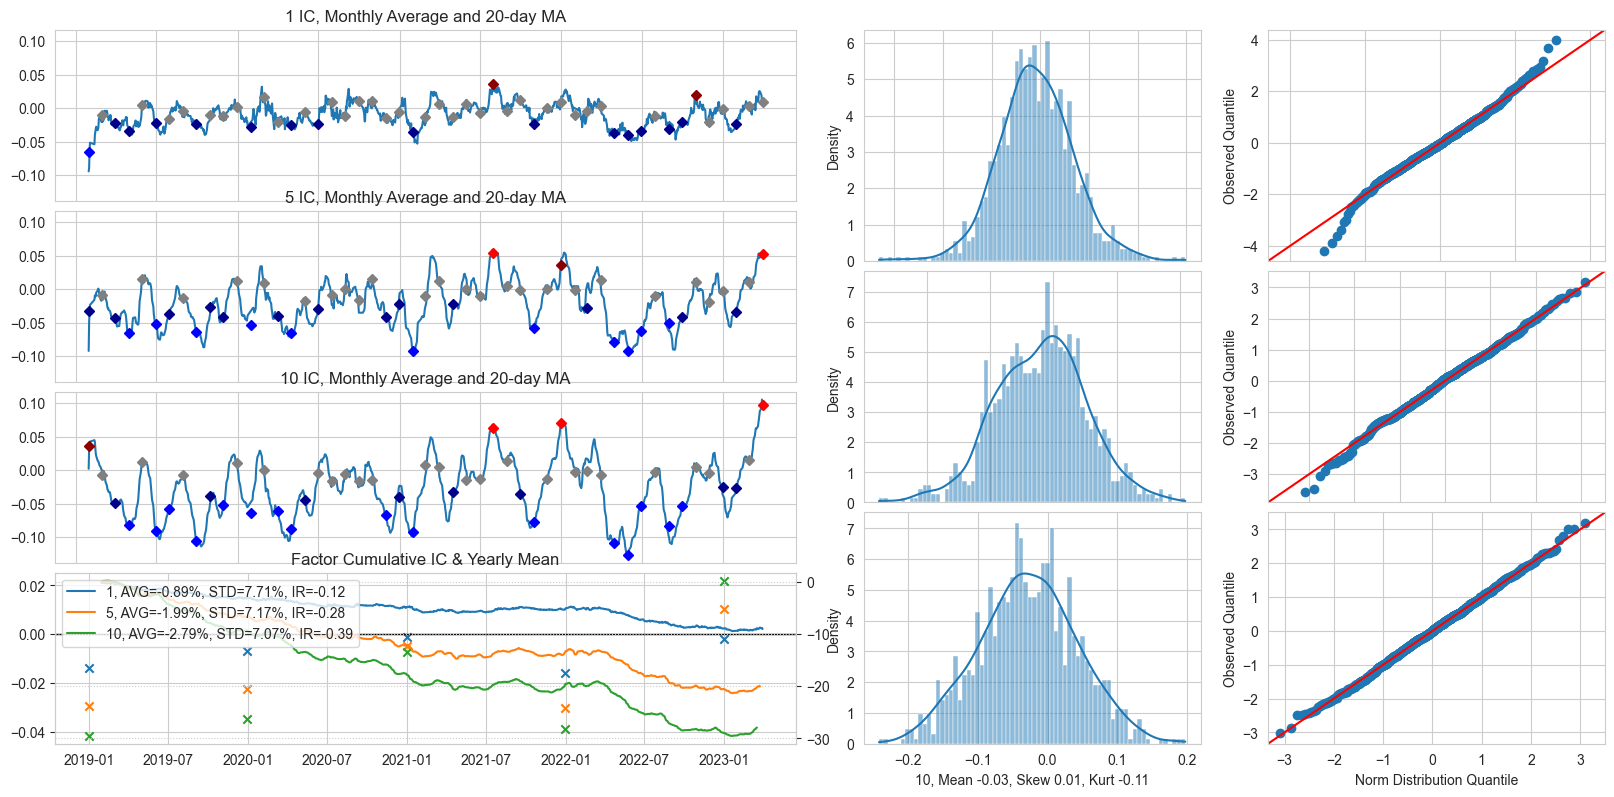

             1         5         10
mean  -0.008939 -0.019913 -0.027895
std    0.077090  0.071701  0.070707
ir    -0.115952 -0.277725 -0.394510
> 0    0.444554  0.404573  0.349650
< 0    0.555446  0.595427  0.650350
> 3%   0.299010  0.239563  0.205794
< -3%  0.395050  0.429423  0.492507
> 5%   0.205941  0.152087  0.135864
< -5%  0.280198  0.342942  0.369630


In [6]:
#获取该因子ic的回测数据
df_ic = mng.get_ic("pearson")

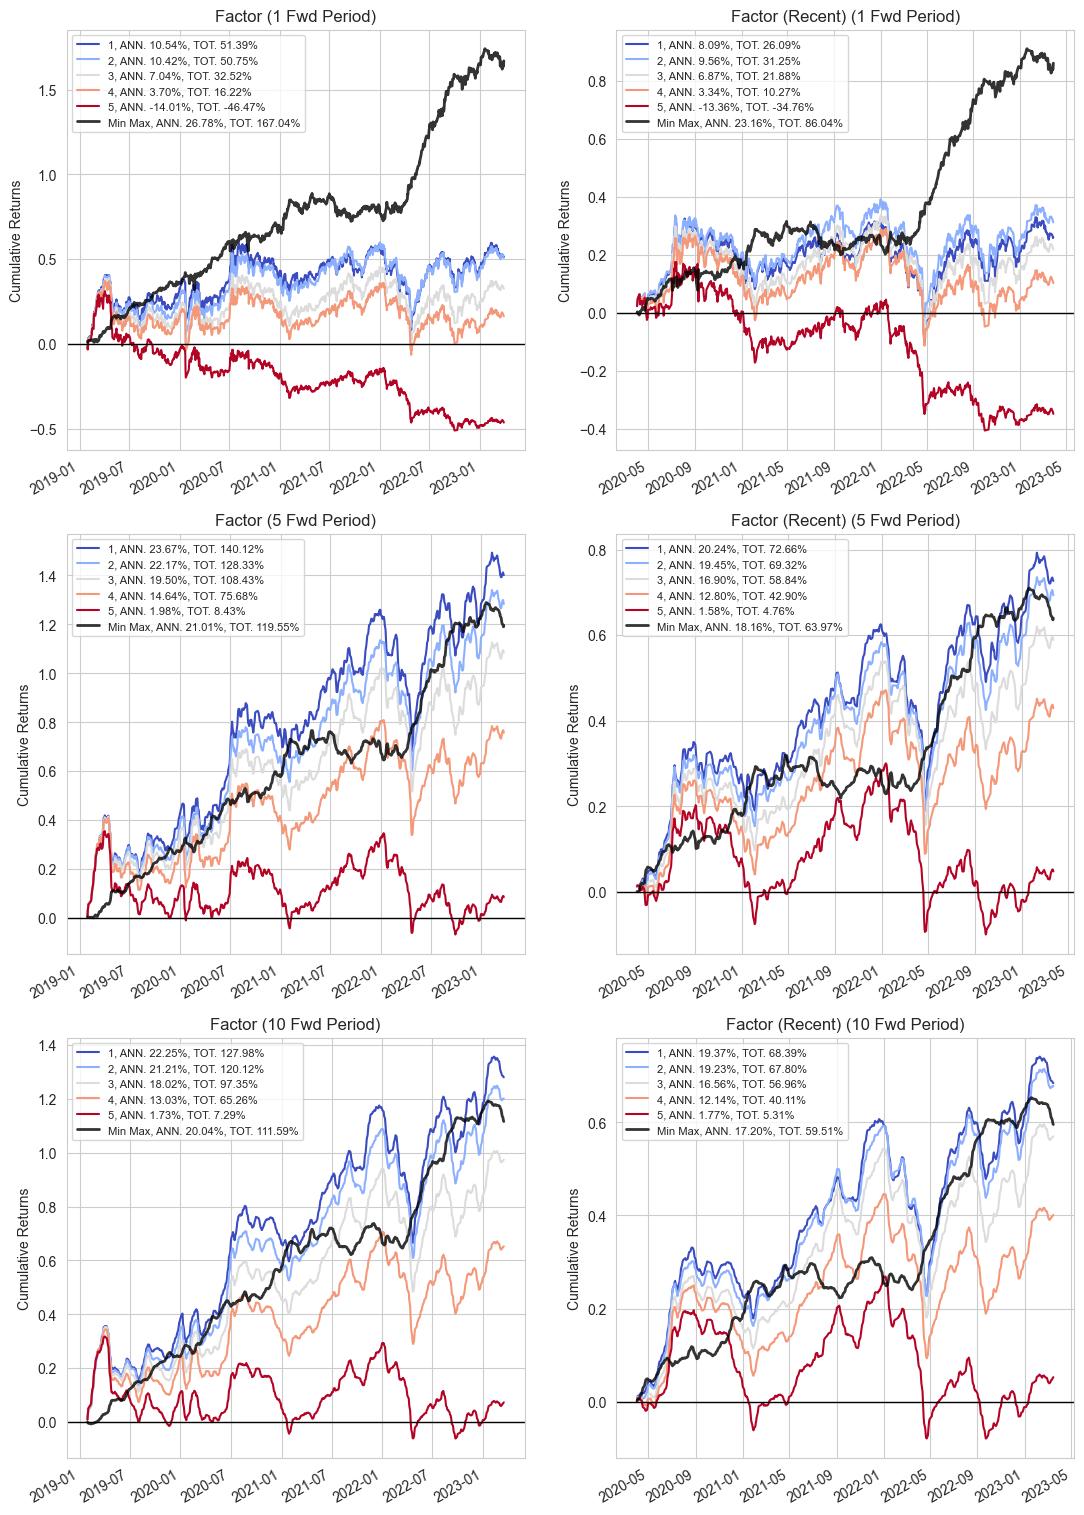

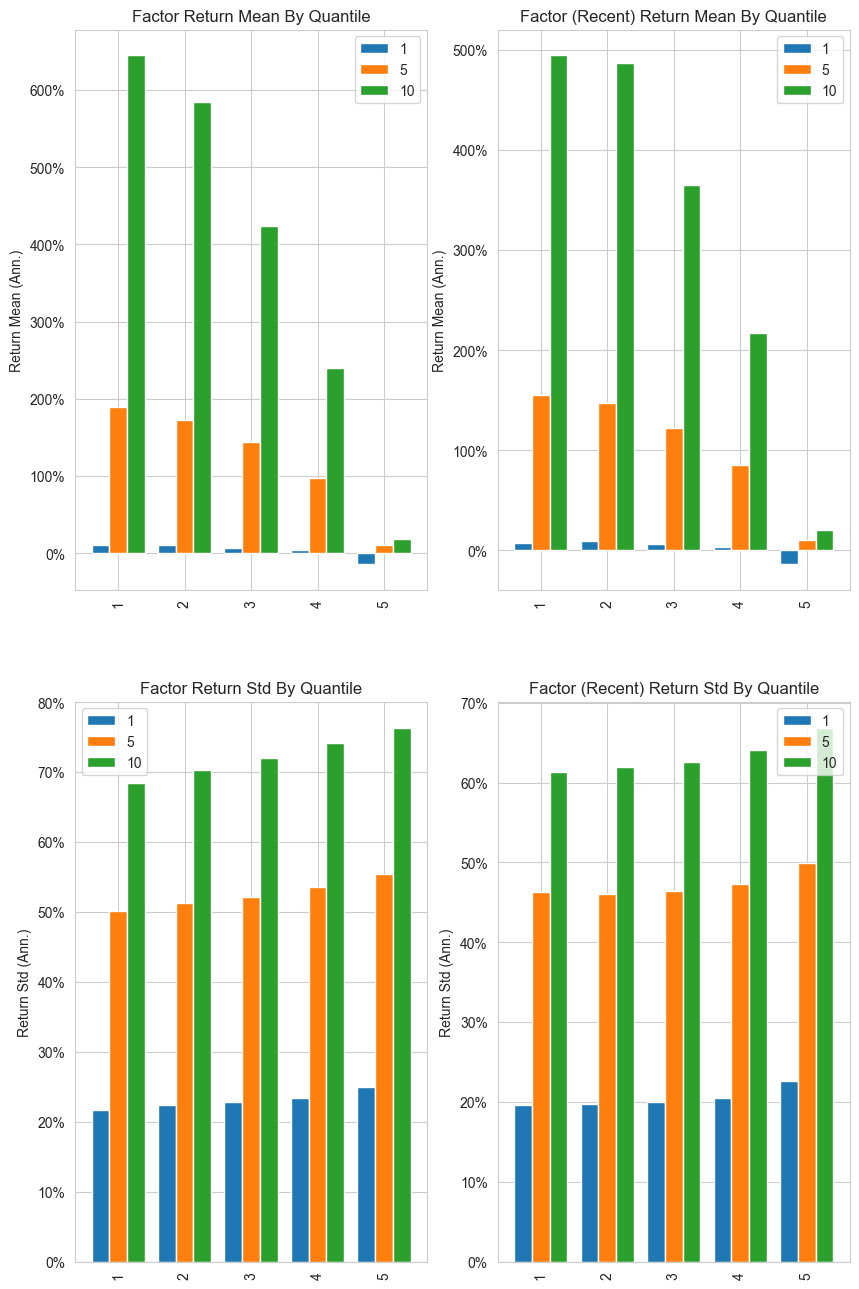

In [7]:
#获取该因子quantile return的回测数据
df_qr = mng.get_quantile_returns(5)

In [8]:
# 第二个因子
def ts_sum(df: pd.DataFrame, window: int = 10) -> pd.DataFrame:
    """Computes the rolling ts_sum for the given window size.

    Args:
        df (pd.DataFrame): tickers in columns, dates in rows.
        window      (int): size of rolling window.

    Returns:
        pd.DataFrame: the ts_sum over the last 'window' days.
    """
    return df.rolling(window).sum()
factor2 = ts_sum(close_price)


D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


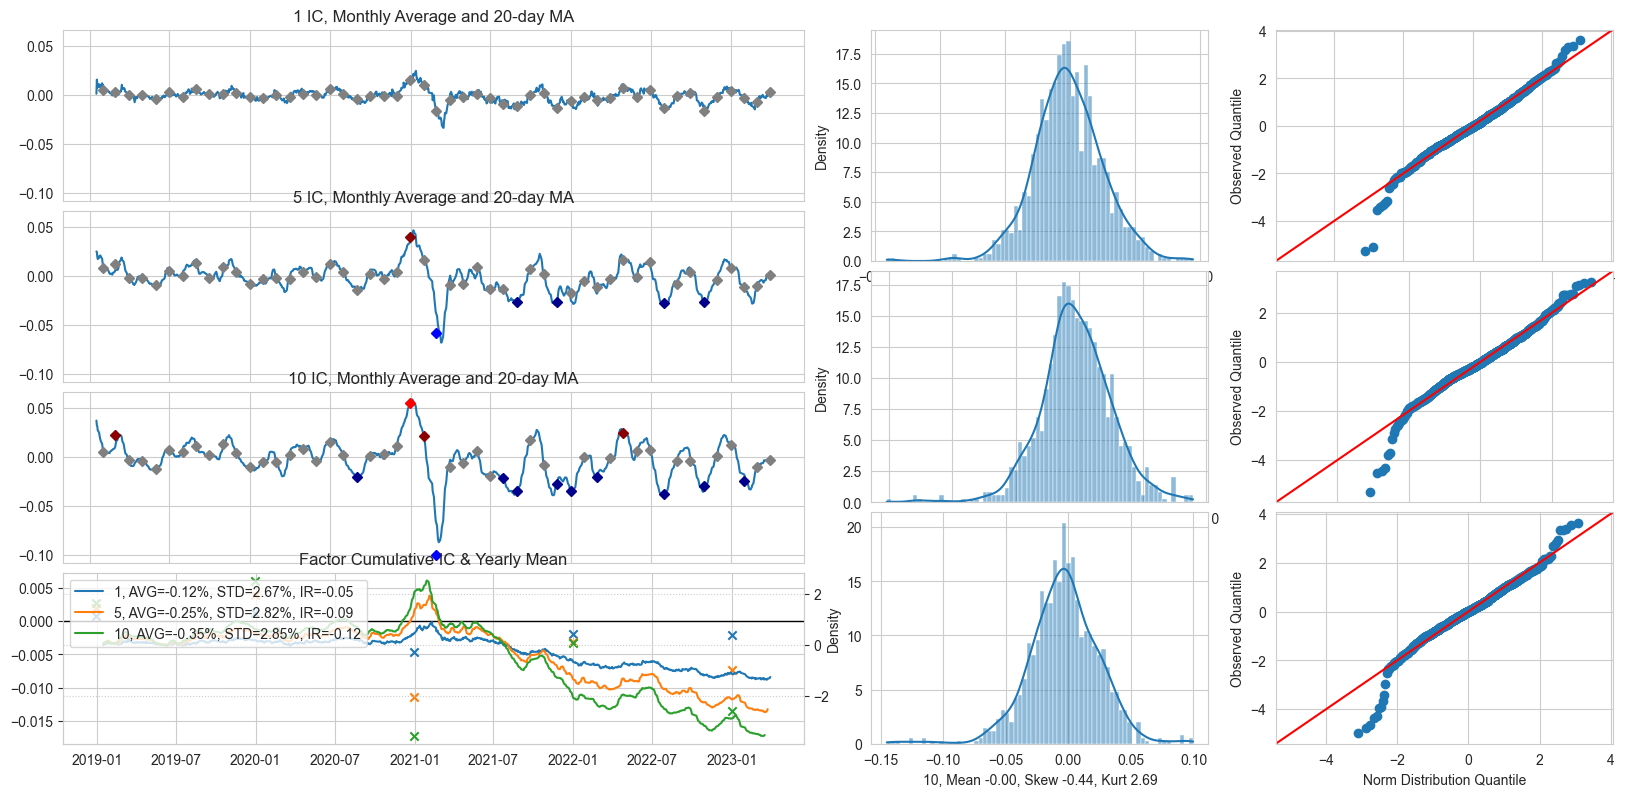

             1         5         10
mean  -0.001229 -0.002479 -0.003498
std    0.026732  0.028226  0.028467
ir    -0.045960 -0.087832 -0.122873
> 0    0.463725  0.449803  0.442136
< 0    0.536275  0.550197  0.557864
> 3%   0.112745  0.105315  0.102868
< -3%  0.110784  0.135827  0.144411
> 5%   0.031373  0.035433  0.019782
< -5%  0.032353  0.039370  0.046489


In [9]:
mng2 =Evaluator(factor2, fr)
df_ic = mng2.get_ic("pearson")

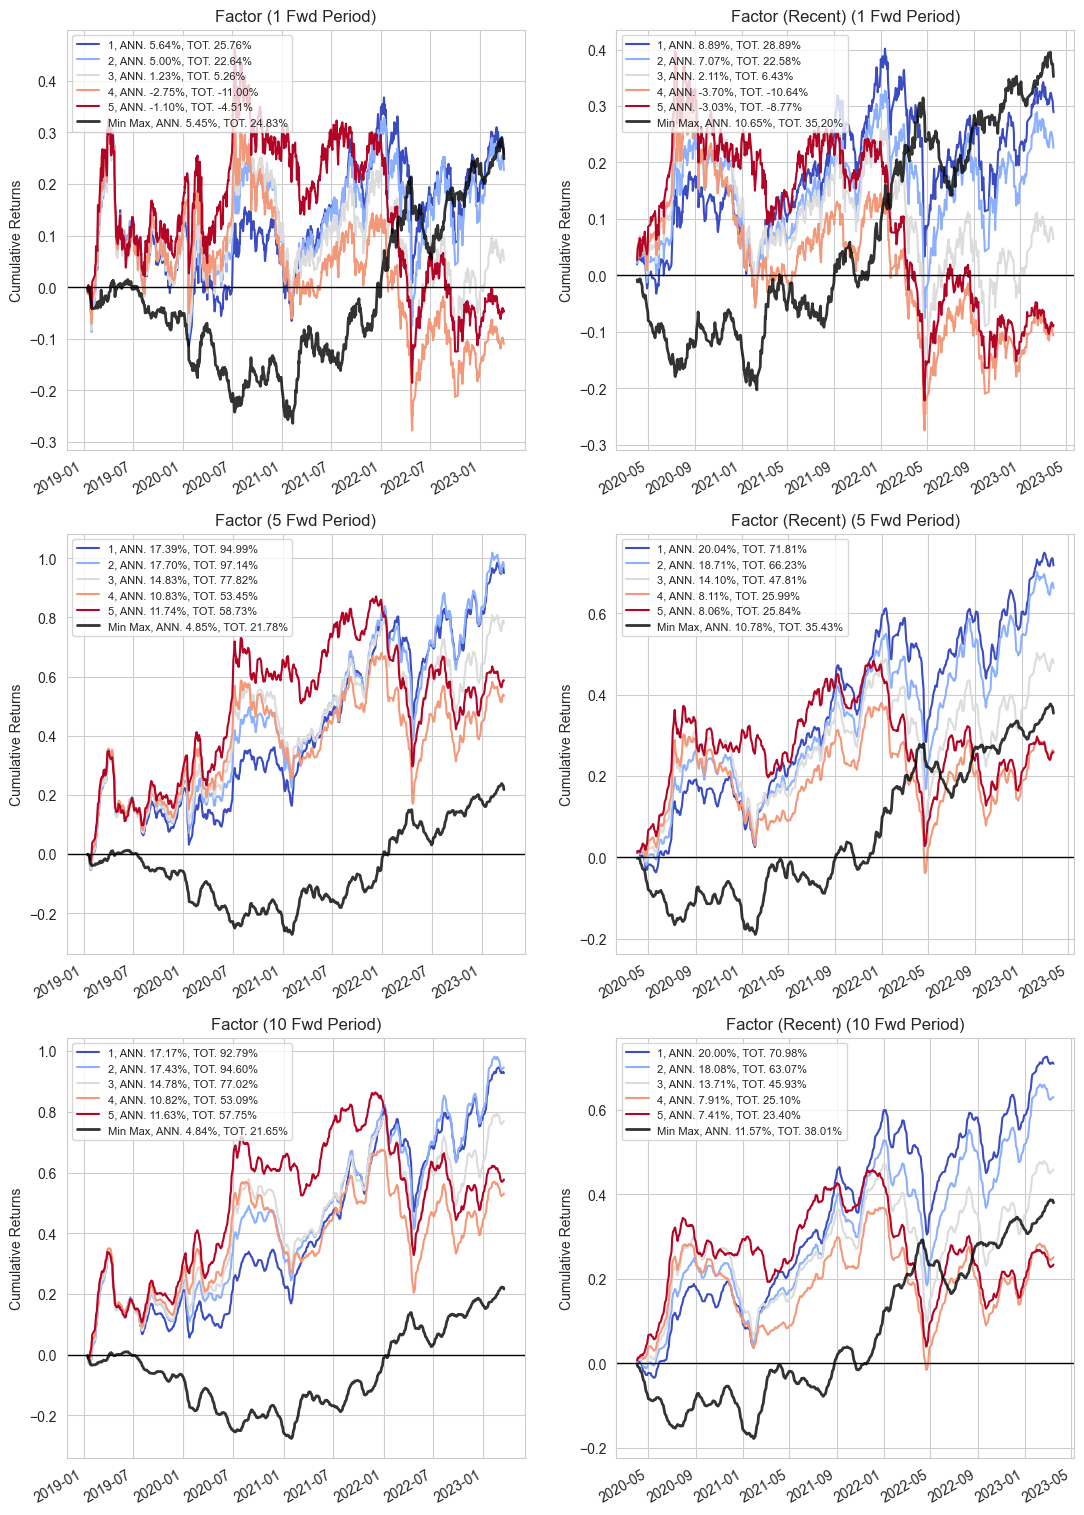

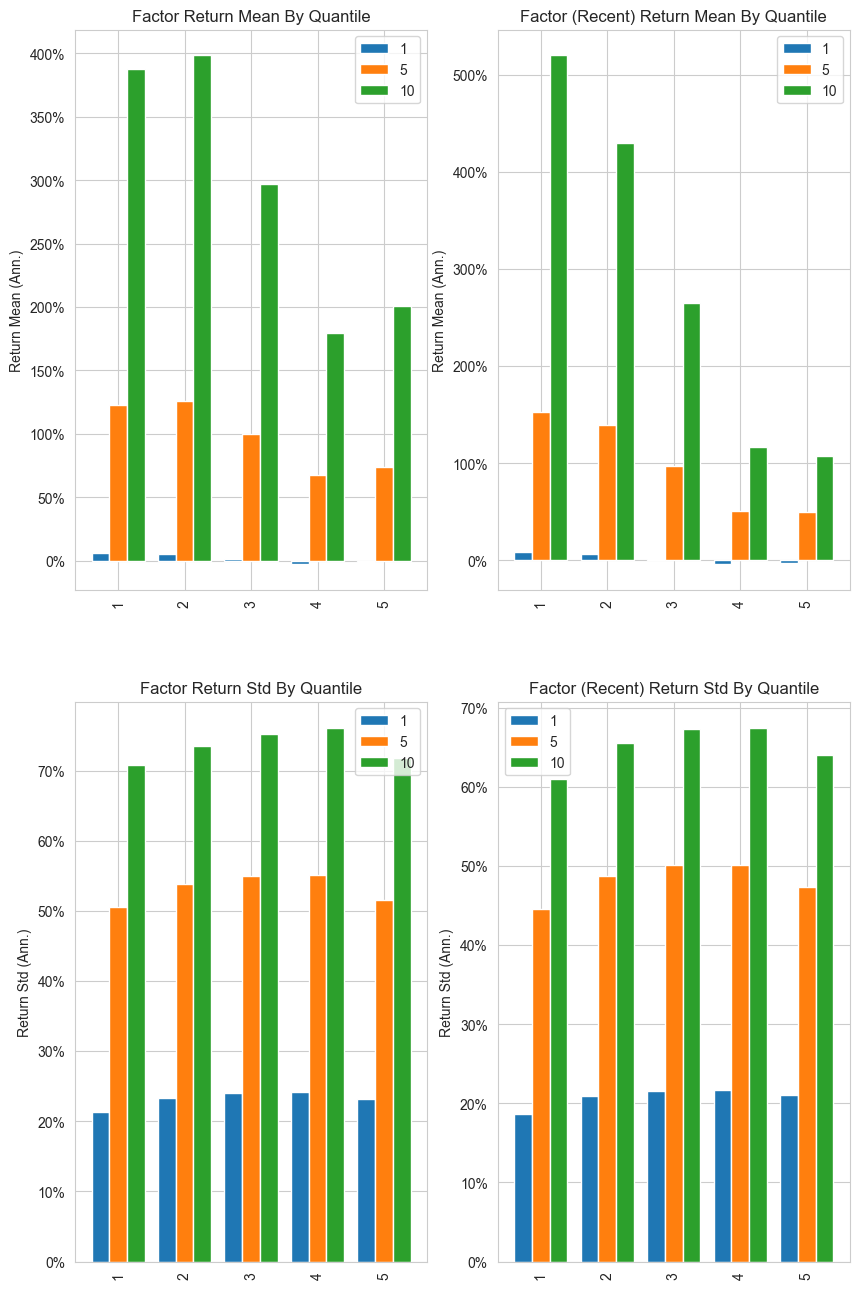

In [10]:
df_qr = mng2.get_quantile_returns(5)

In [11]:
# 第三个因子
def ts_std(df, window=10):
    """
    Wrapper function to estimate rolling standard deviation.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return (df
            .rolling(window)
            .std())

factor3 = ts_std(volume,window=20)

D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


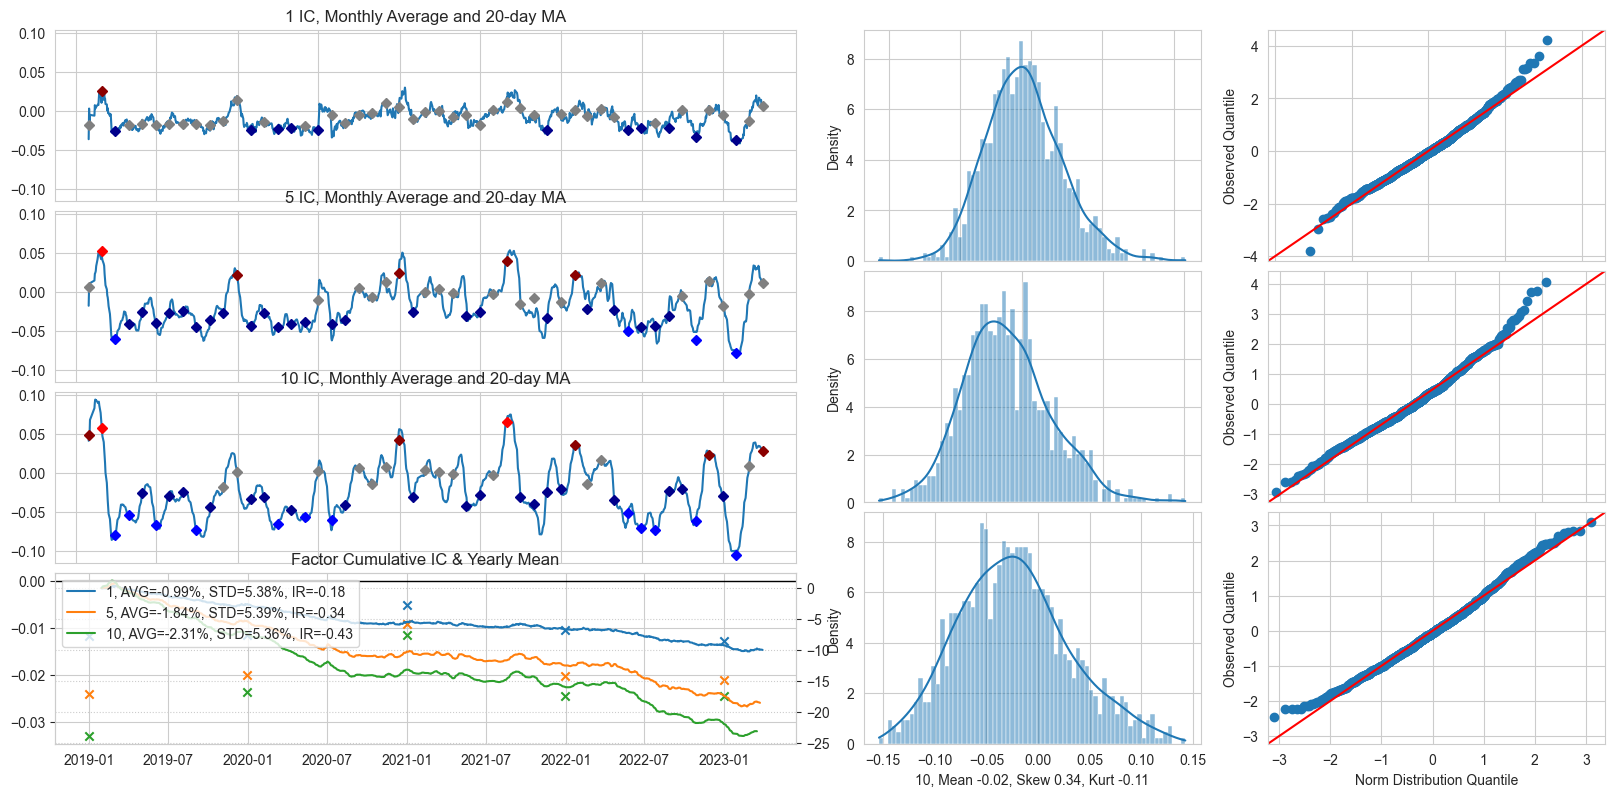

             1         5         10
mean  -0.009876 -0.018400 -0.023076
std    0.053793  0.053943  0.053616
ir    -0.183585 -0.341095 -0.430388
> 0    0.401980  0.348907  0.308691
< 0    0.598020  0.651093  0.691309
> 3%   0.221782  0.177932  0.160839
< -3%  0.372277  0.439364  0.469530
> 5%   0.127723  0.110338  0.096903
< -5%  0.218812  0.292247  0.326673


In [12]:
mng3 =Evaluator(factor3, fr)
df_ic = mng3.get_ic("pearson")

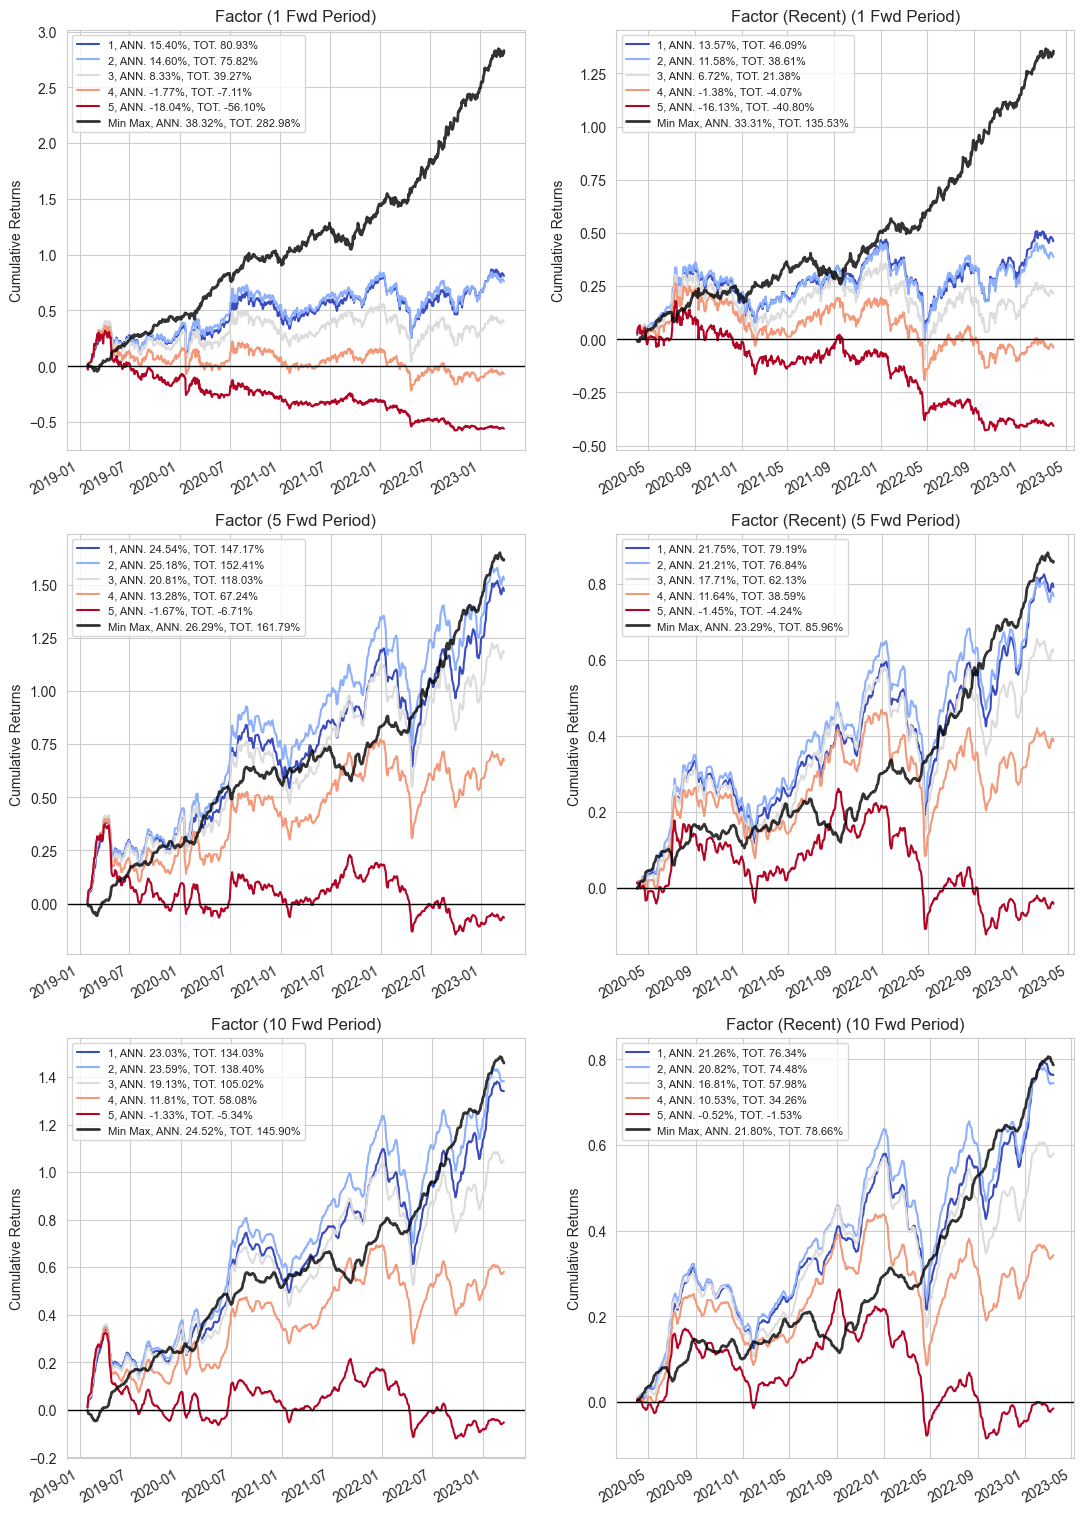

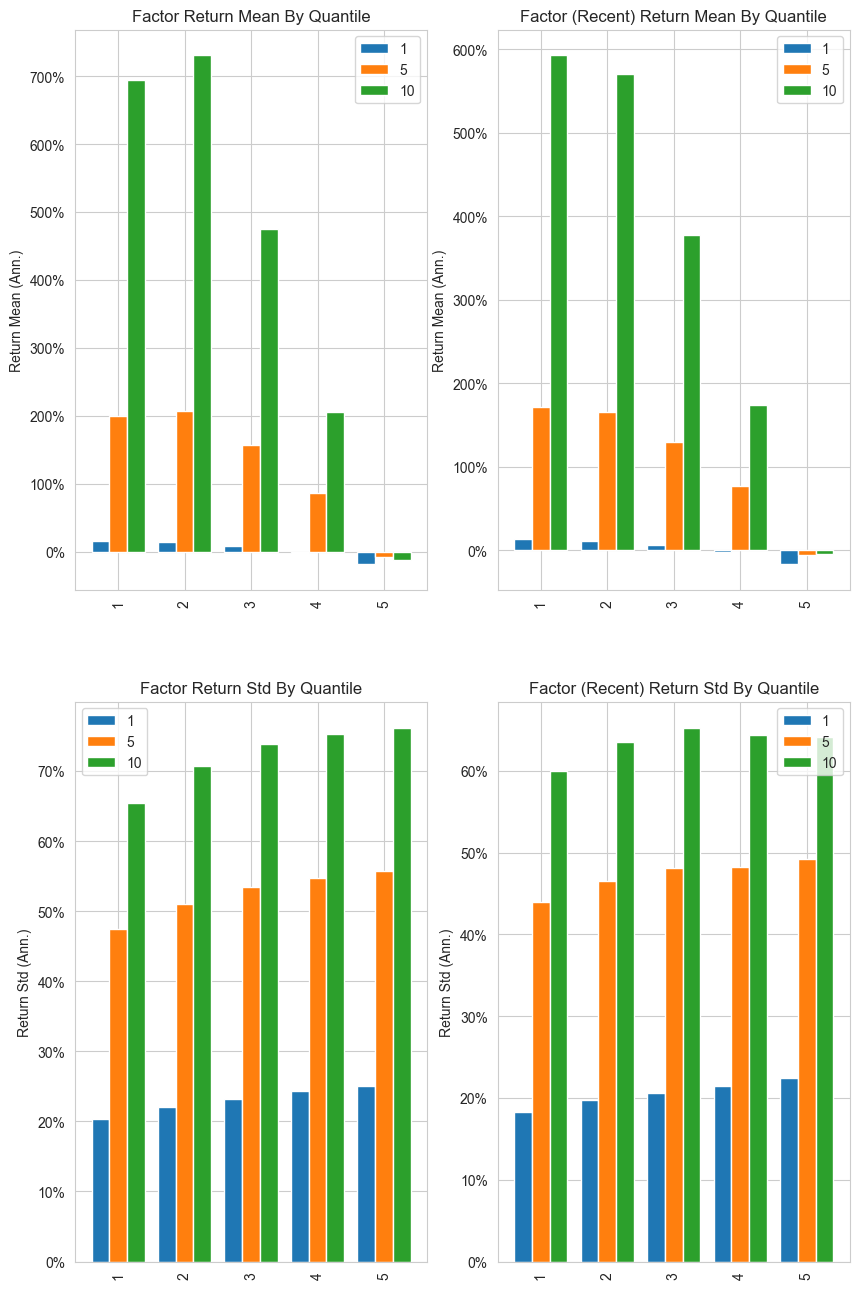

In [13]:
df_qr = mng3.get_quantile_returns(5)

In [14]:
#烂因子
ret_adj = data["return_adj"].loc[start_date:end_date]
ret_5d = ret_adj - ret_adj.shift(4)
factor4 = ret_adj/ts_std(close_price,window=5)

D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
D:\Anaconda\envs\firefin\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


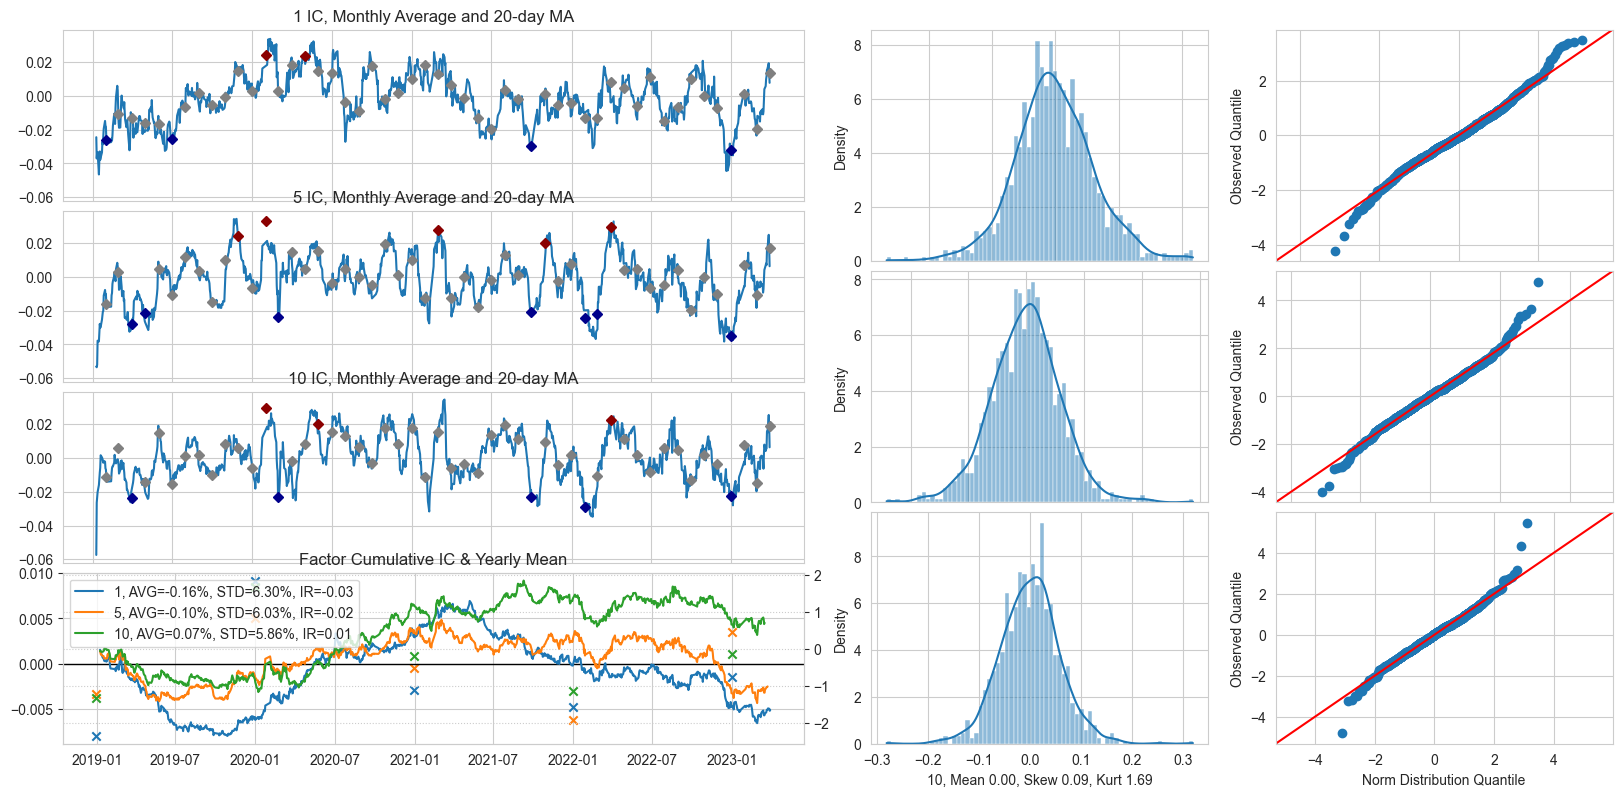

             1         5         10
mean  -0.001615 -0.000994  0.000695
std    0.063043  0.060324  0.058585
ir    -0.025613 -0.016479  0.011863
> 0    0.467317  0.504407  0.514764
< 0    0.532683  0.495593  0.485236
> 3%   0.284878  0.283056  0.283465
< -3%  0.303415  0.300686  0.284449
> 5%   0.179512  0.175318  0.171260
< -5%  0.203902  0.190010  0.172244


In [15]:
mng4 =Evaluator(factor4, fr)
df_ic = mng4.get_ic("pearson")

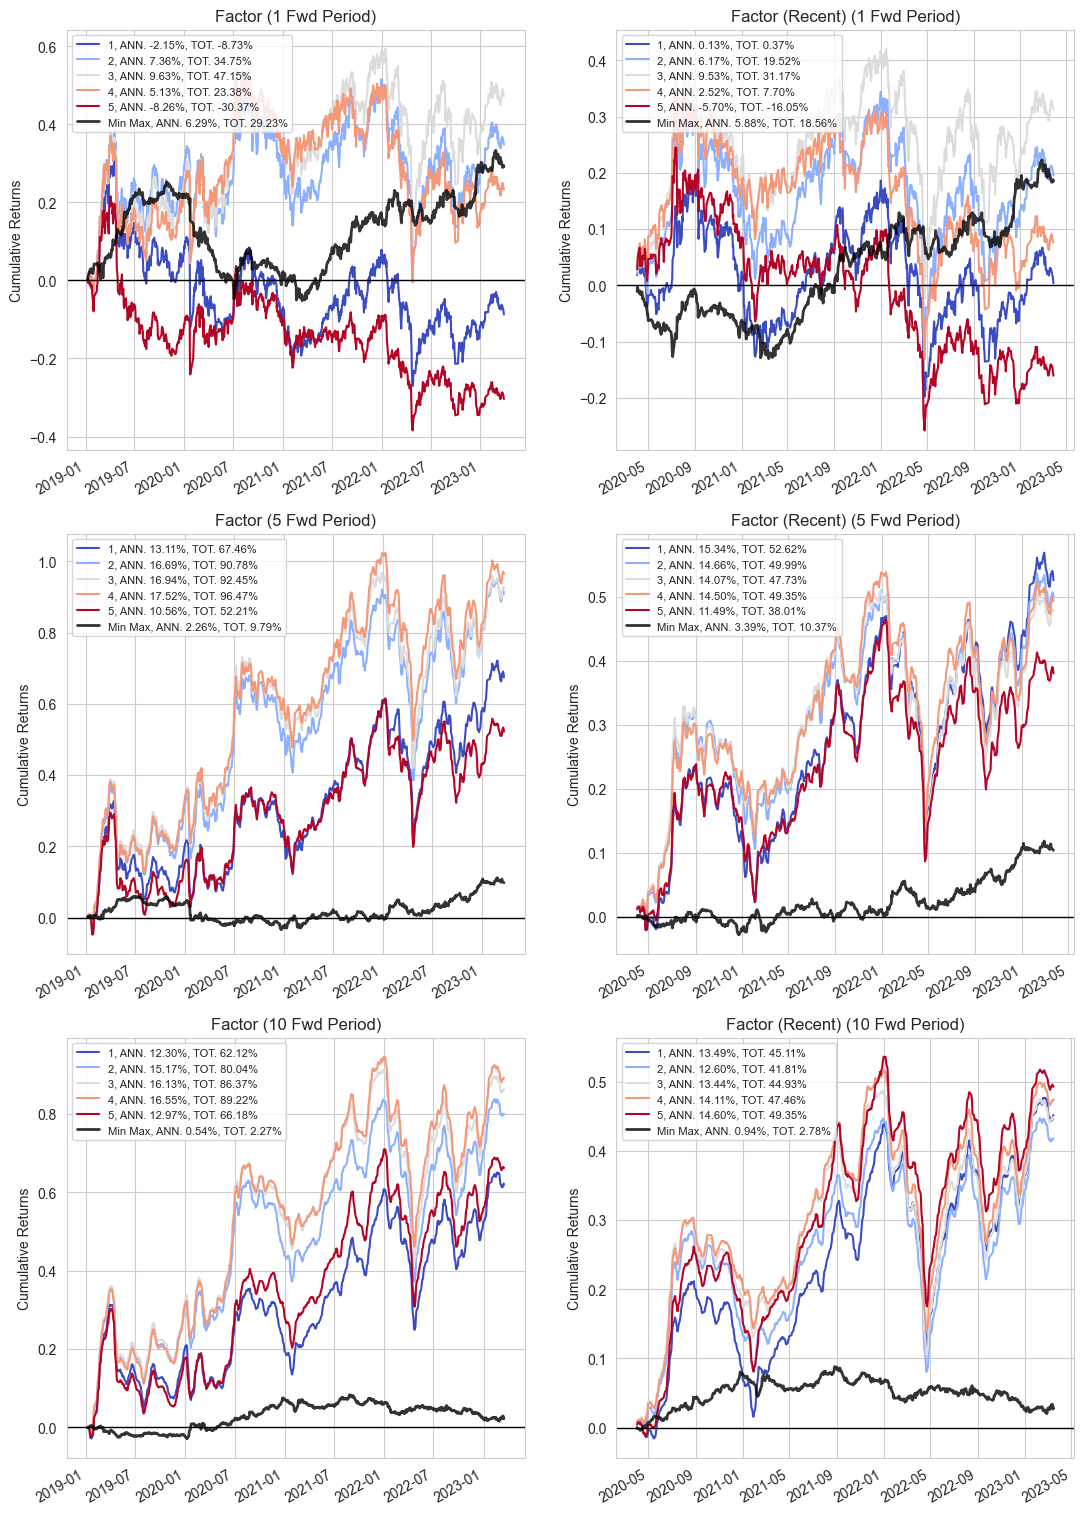

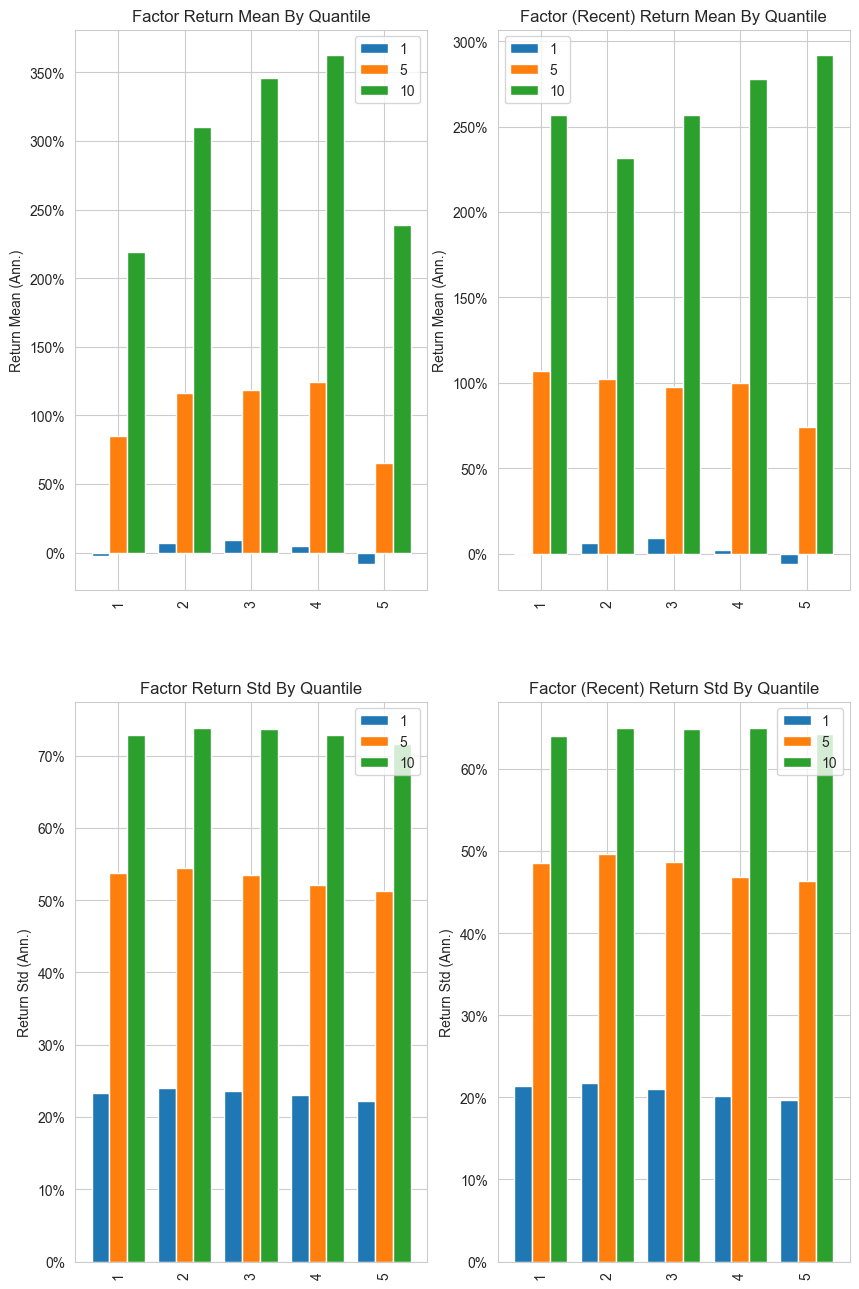

In [16]:
df_qr = mng4.get_quantile_returns(5)